In [7]:
import time
from election_functions import ElectionGame
from eraser import Eraser
from election_functions import get_election_results, get_reward_matrices, get_rep_states, get_dem_states
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm

In [19]:
# Select Election Year
election_year = 2016

# Select Number of Coverage Resources (1-51)
resources = 1

# Select Hacker Type/Situation (1-4)
situation = 1

# Situation 1: Publicity Hacker (PH)
# Situation 2: Democrat Hacker, Partisan (DH)
# Situation 3: Republican Hacker, Partisan (RH)
# Situation 4: Mixed Hackers, 1/3 probability of getting either PH, DH, or RH

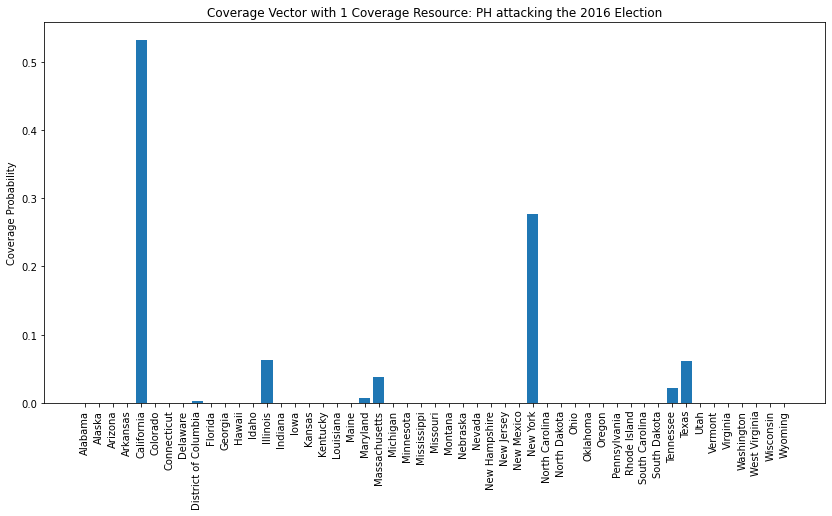

In [20]:
payoff_df = pd.DataFrame()
# Generate Reward Functions
clean_election_results, state_list, electoral_votes = get_election_results(election_year)
republican_states = get_rep_states(clean_election_results, state_list)
democrat_states = get_dem_states(clean_election_results, state_list)

# define attacker types here
attack_targets_list = [[state_list],
                       [republican_states],
                       [democrat_states],
                       [state_list, republican_states, democrat_states]]

partisan_type_list = [[False],
                      [True],
                      [True],
                      [False,True,True]]

description_list = ['publicity_hacker','democrat_hacker','republican_hacker','mixed_hackers']

attack_list = attack_targets_list[situation-1]
partisan_type = partisan_type_list[situation-1]
# Get reward matrices
att_reward_array, def_reward_array = get_reward_matrices(clean_election_results, state_list, attack_list, electoral_votes, partisan_type)
payoffs = []
sec_game = ElectionGame(max_coverage=resources, num_attacker_types=len(
    attack_list), att_reward=att_reward_array, def_reward=def_reward_array)
eraser_solver = Eraser(sec_game)
eraser_solver.solve()
payoffs.append(eraser_solver.opt_defender_payoff)
coverage_vector = eraser_solver.opt_coverage
payoff_df[description_list[situation-1]] = payoffs
plt.rcParams['figure.figsize']=(14,7)
plt.bar(range(51),coverage_vector)
plt.xticks(range(51), state_list,rotation='vertical')
plt.ylabel('Coverage Probability')
plt.title('Coverage Vector with 1 Coverage Resource: PH attacking the 2016 Election')
plt.savefig('2016_single_coverage_vector.png', dpi = 300)